![Logo](https://www.up.edu.mx/wp-content/themes/panamericana/img/logo-footer.png)

# **Tarea 3: Desestacionalidad series de tiempo y Regresión lineal simple**

## **Asignatura:** Econometría  
## **Profesora:** Mae. Julieta María Sarralde

---

**Nombre del Alumno:**  
Luis Enrique Noguera Gil

**Fecha de entrega:**  
01 de septiembre de 2024


# Auto reload modules

In [2]:
%load_ext autoreload
%autoreload 2

In [ ]:
import scripts.index as index
import fs

In [29]:
MAIN_DIR = fs.open_fs("../../data/raw/HW03")
CSV_DIR = MAIN_DIR.getsyspath("T03.csv")

In [26]:
DIR = fs.open_fs(".")
NB_DIR = DIR.getsyspath("0.0-leng-HW03.ipynb")

# Extrae los encabezados y genera el índice
headings = index.extract_headings(NB_DIR)
toc = index.generate_toc(headings)

# Muestra el índice generado
# print(toc)

- [**Tarea 3: Desestacionalidad series de tiempo y Regresión lineal simple**](#**tarea-3:-desestacionalidad-series-de-tiempo-y-regresión-lineal-simple**)
  - [**Asignatura:** Econometría](#**asignatura:**-econometría)
  - [**Profesora:** Mae. Julieta María Sarralde](#**profesora:**-mae.-julieta-maría-sarralde)
- [Auto reload modules](#auto-reload-modules)
  - [Ejercicio](#ejercicio)
    - [1. Si establecemos como “regla de dedo” que una serie presenta poca variación si el coeficiente de variación es menor a 30%. En el caso de las exportaciones de aguacate ¿cuánto vale el coeficiente de variación? Exprese su resultado en porcentaje con dos decimales.](#1.-si-establecemos-como-“regla-de-dedo”-que-una-serie-presenta-poca-variación-si-el-coeficiente-de-variación-es-menor-a-30%.-en-el-caso-de-las-exportaciones-de-aguacate-¿cuánto-vale-el-coeficiente-de-variación?-exprese-su-resultado-en-porcentaje-con-dos-decimales.)
    - [2. Considerando las estadísticas descriptivas de la serie de tiempo de las exportaciones de aguacate ¿qué puede concluir? Incluya los gráficos relevantes para su análisis.](#2.-considerando-las-estadísticas-descriptivas-de-la-serie-de-tiempo-de-las-exportaciones-de-aguacate-¿qué-puede-concluir?-incluya-los-gráficos-relevantes-para-su-análisis.)
    - [3. Considerando un modelo de regresión de la serie original contra el tiempo, el valor del coeficiente de pendiente muestral es en miles de toneladas es:](#3.-considerando-un-modelo-de-regresión-de-la-serie-original-contra-el-tiempo,-el-valor-del-coeficiente-de-pendiente-muestral-es-en-miles-de-toneladas-es:)
    - [4. Elabore la prueba de hipótesis correspondiente con un 0.05 de significancia para validar si las exportaciones de aguacate han venido creciendo en el tiempo.](#4.-elabore-la-prueba-de-hipótesis-correspondiente-con-un-0.05-de-significancia-para-validar-si-las-exportaciones-de-aguacate-han-venido-creciendo-en-el-tiempo.)
    - [5. Aplicando la técnica de desestacionalidad simple vista en clase, obtenga los índices estacionales e interprételos.](#5.-aplicando-la-técnica-de-desestacionalidad-simple-vista-en-clase,-obtenga-los-índices-estacionales-e-interprételos.)
    - [6. Obtenga la regresión lineal simple con los datos desestacionalizados y el tiempo y elabore la prueba de hipótesis correspondiente con un 0.05 de significancia para validar si la tendencia de las exportaciones de aguacate ha venido creciendo en el tiempo.](#6.-obtenga-la-regresión-lineal-simple-con-los-datos-desestacionalizados-y-el-tiempo-y-elabore-la-prueba-de-hipótesis-correspondiente-con-un-0.05-de-significancia-para-validar-si-la-tendencia-de-las-exportaciones-de-aguacate-ha-venido-creciendo-en-el-tiempo.)
    - [7. Proporcione un intervalo al 95% de confianza para el valor de la tendencia de la serie de exportaciones de aguacate en el segundo bimestre del 2024.](#7.-proporcione-un-intervalo-al-95%-de-confianza-para-el-valor-de-la-tendencia-de-la-serie-de-exportaciones-de-aguacate-en-el-segundo-bimestre-del-2024.)
    - [8. Compare los resultados de los modelos de regresión lineal simple ajustados a la serie de tiempo original y a la serie desestacionalizada, ambos contra el tiempo. ¿cuál es una explicación sólida para justificar el hecho de que el coeficiente de determinación cambie?](#8.-compare-los-resultados-de-los-modelos-de-regresión-lineal-simple-ajustados-a-la-serie-de-tiempo-original-y-a-la-serie-desestacionalizada,-ambos-contra-el-tiempo.-¿cuál-es-una-explicación-sólida-para-justificar-el-hecho-de-que-el-coeficiente-de-determinación-cambie?)
    - [9. Grafique los pronósticos obtenidos con ambas técnicas y comente los resultados.](#9.-grafique-los-pronósticos-obtenidos-con-ambas-técnicas-y-comente-los-resultados.)

## Ejercicio 

México es el mayor productor y exportador mundial de aguacate, una fruta que ha ganado popularidad global por su valor nutricional y versatilidad en la cocina. El aguacate, conocido por su riqueza en grasas saludables, vitaminas y minerales, es un componente esencial en dietas equilibradas y ha visto un aumento significativo en su demanda en mercados internacionales.

La industria del aguacate es un pilar fundamental de la economía agrícola mexicana. En las últimas décadas, el aguacate ha pasado de ser un producto regional a convertirse en una de las principales exportaciones agrícolas del país. La producción y exportación de aguacate no solo contribuyen de manera significativa al PIB agrícola, sino que también generan empleo en diversas regiones, particularmente en los estados de Michoacán y Jalisco, que son los principales productores.

A continuación en la tabla no1 se muestran los datos bimestrales de la exportación de agucate en toneladas:

In [4]:
# Librerías

import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [5]:
len([2019, 2019, 2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
            2021, 2021, 2021, 2021, 2021, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2023, 
            2023, 2023, 2023, 2023, 2023])

33

In [6]:
len([1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 
                3, 4, 5, 6])

30

In [7]:
data = {
    'Año': [2019, 2019, 2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020, 2020, 2020, 2021, 2021, 
            2021, 2021, 2021, 2021, 2022, 2022, 2022, 2022, 2022, 2022, 2023, 2023, 2023, 2023, 
            2023, 2023],
    'Bimestre': [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 
                3, 4, 5, 6],
    't': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 
          25, 26, 27, 28, 29, 30],
    'Toneladas': [224604.04, 201125.90, 154184.06, 140857.77, 213070.50, 268644.20, 316793.52, 
                  283659.09, 217428.69, 198535.98, 300467.80, 378764.26, 410806.71, 367955.31, 
                  282092.18, 257532.45, 389706.87, 491240.80, 405077.56, 362765.23, 278092.64, 
                  253986.68, 384156.60, 484431.36, 426151.46, 381653.51, 292635.95, 267180.48, 
                  404208.92, 522430.98]
}

df = pd.DataFrame(data)
df

,Año,Bimestre,t,Toneladas
0,2019,1,1,224604.04
1,2019,2,2,201125.90
2,2019,3,3,154184.06
3,2019,4,4,140857.77
4,2019,5,5,213070.50
5,2019,6,6,268644.20
6,2020,1,7,316793.52
7,2020,2,8,283659.09
8,2020,3,9,217428.69
9,2020,4,10,198535.98


In [30]:
df.to_csv(CSV_DIR, encoding='utf-8', index=False)

<Axes: xlabel='t', ylabel='Toneladas'>

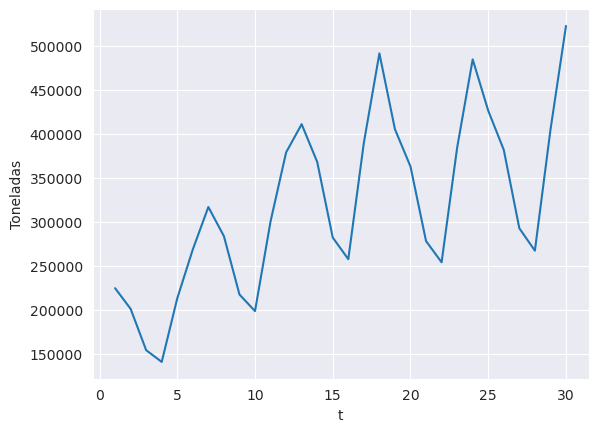

In [8]:
sns.lineplot(data=df, x='t', y='Toneladas')

Conteste las siguientes preguntas.

###  1. Si establecemos como “regla de dedo” que una serie presenta poca variación si el coeficiente de variación es menor a 30%. En el caso de las exportaciones de aguacate ¿cuánto vale el coeficiente de variación? Exprese su resultado en porcentaje con dos decimales.

In [9]:
y_bar = df['Toneladas'].mean()
s_y = df['Toneladas'].std()
cv = s_y / y_bar
print(f"Se tiene un promedio de {y_bar:,.2f} Toneladas, con una desviación estándar de: {s_y:,.2f}.")
print(f"El coeficiente de varación es {(cv * 100):.2f} %")

Se tiene un promedio de 318,674.72 Toneladas, con una desviación estándar de: 100,061.44.
El coeficiente de varación es 31.40 %


In [10]:
print("Presenta poca variación" if cv < 0.3 else "Presenta mucha variación")

Presenta mucha variación


### 2. Considerando las estadísticas descriptivas de la serie de tiempo de las exportaciones de aguacate ¿qué puede concluir? Incluya los gráficos relevantes para su análisis.

In [11]:
df['Toneladas'].describe()

count        30.000000
mean     318674.716667
std      100061.438890
min      140857.770000
25%      254873.122500
50%      296551.875000
75%      388319.302500
max      522430.980000
Name: Toneladas, dtype: float64

### 3. Considerando un modelo de regresión de la serie original contra el tiempo, el valor del coeficiente de pendiente muestral es en miles de toneladas es:

In [12]:
model_df = (
    smf.ols(
        formula='Toneladas ~ t',
        data=df
    )
    .fit()
)

In [13]:
model_df.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
======================================================================
Model:               OLS               Adj. R-squared:      0.419     
Dependent Variable:  Toneladas         AIC:                 761.5728  
Date:                2024-08-30 18:40  BIC:                 764.3752  
No. Observations:    30                Log-Likelihood:      -378.79   
Df Model:            1                 F-statistic:         21.94     
Df Residuals:        28                Prob (F-statistic):  6.58e-05  
R-squared:           0.439             Scale:               5.8140e+09
----------------------------------------------------------------------
             Coef.     Std.Err.    t    P>|t|     [0.025      0.975]  
----------------------------------------------------------------------
Intercept 201901.1614 28553.5108 7.0710 0.0000 143411.9460 260390.3768
t           7533.7778  1608.3826 4.6841 0.0001   4239.1553  10828.4002
----------------------------------------------------------------------
Omnibus:                0.711          Durbin-Watson:            0.997
Prob(Omnibus):          0.701          Jarque-Bera (JB):         0.695
Skew:                   -0.009         Prob(JB):                 0.707
Kurtosis:               2.255          Condition No.:            37   
======================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
"""

In [27]:
print(f"El coeficiente b1 = slope = {model_df.params['t']:,.3f}")
print(f"El coeficiente b0 = intercept = {model_df.params['Intercept']:,.3f}")

El coeficiente b1 = slope = 7,533.778
El coeficiente b0 = intercept = 201,901.161


In [15]:
print(f"El coeficiente de pendiente muestral es {model_df.params['t']:,.3f} en miles de toneladas.")

El coeficiente de pendiente muestral es 7,533.778 en miles de toneladas.


### 4. Elabore la prueba de hipótesis correspondiente con un 0.05 de significancia para validar si las exportaciones de aguacate han venido creciendo en el tiempo.

### 5. Aplicando la técnica de desestacionalidad simple vista en clase, obtenga los índices estacionales e interprételos.

In [16]:
df.head()

,Año,Bimestre,t,Toneladas
0,2019,1,1,224604.04
1,2019,2,2,201125.90
2,2019,3,3,154184.06
3,2019,4,4,140857.77
4,2019,5,5,213070.50


Obtención del promedio anual

In [17]:
df_year = df[['Año', 'Toneladas']].groupby('Año').sum()
df_year

,Toneladas
Año,
2019,1202486.47
2020,1695649.34
2021,2199334.32
2022,2168510.07
2023,2294261.30


División del promedio anual entre el valor de las toneladas.

In [18]:
df2 = df.copy()
df2['Toneladas_anual'] = df2.apply(lambda row: row['Toneladas'] / df_year.loc[row['Año'], 'Toneladas'], axis=1)
df2


,Año,Bimestre,t,Toneladas,Toneladas_anual
0,2019,1,1,224604.04,0.186783
1,2019,2,2,201125.90,0.167258
2,2019,3,3,154184.06,0.128221
3,2019,4,4,140857.77,0.117139
4,2019,5,5,213070.50,0.177192
5,2019,6,6,268644.20,0.223407
6,2020,1,7,316793.52,0.186827
7,2020,2,8,283659.09,0.167286
8,2020,3,9,217428.69,0.128227
9,2020,4,10,198535.98,0.117086


Obtención del promedio por periodo.

In [19]:
df_bim = df2[['Bimestre','Toneladas_anual']].groupby('Bimestre').sum()
df_bim

,Toneladas_anual
Bimestre,
1,0.932944
2,0.835487
3,0.640504
4,0.584901
5,0.884919
6,1.121246


Validación del número de periodos

In [20]:
df2.groupby('Bimestre').sum().reset_index()['Toneladas_anual'].sum()

5.0

División del promedio por periodos. 

In [21]:
df2 = df.copy()
df2['Toneladas_periodo'] = df2.apply(lambda row: row['Toneladas'] / df_bim.loc[row['Bimestre'], 'Toneladas_anual'], axis=1)
df2


,Año,Bimestre,t,Toneladas,Toneladas_periodo
0,2019,1,1,224604.04,240747.676164
1,2019,2,2,201125.90,240728.957134
2,2019,3,3,154184.06,240723.186613
3,2019,4,4,140857.77,240823.319080
4,2019,5,5,213070.50,240779.697270
5,2019,6,6,268644.20,239594.347300
6,2020,1,7,316793.52,339563.365662
7,2020,2,8,283659.09,339513.493376
8,2020,3,9,217428.69,339465.228233
9,2020,4,10,198535.98,339435.259130


### 6. Obtenga la regresión lineal simple con los datos desestacionalizados y el tiempo y elabore la prueba de hipótesis correspondiente con un 0.05 de significancia para validar si la tendencia de las exportaciones de aguacate ha venido creciendo en el tiempo.

In [22]:
model_df2 = (
    smf.ols(
        formula='Toneladas_periodo ~ t',
        data=df2
    )
    .fit()
)

In [23]:
model_df2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
=======================================================================
Model:               OLS                Adj. R-squared:      0.794     
Dependent Variable:  Toneladas_periodo  AIC:                 719.6103  
Date:                2024-08-30 18:40   BIC:                 722.4127  
No. Observations:    30                 Log-Likelihood:      -357.81   
Df Model:            1                  F-statistic:         112.9     
Df Residuals:        28                 Prob (F-statistic):  2.47e-11  
R-squared:           0.801              Scale:               1.4355e+09
-----------------------------------------------------------------------
             Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
-----------------------------------------------------------------------
Intercept 250736.8936 14188.1143 17.6723 0.0000 221673.8590 279799.9282
t           8493.6283   799.1983 10.6277 0.0000   6856.5449  10130.7118
-----------------------------------------------------------------------
Omnibus:                1.705          Durbin-Watson:             0.485
Prob(Omnibus):          0.426          Jarque-Bera (JB):          1.567
Skew:                   0.475          Prob(JB):                  0.457
Kurtosis:               2.409          Condition No.:             37   
=======================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
"""

### 7. Proporcione un intervalo al 95% de confianza para el valor de la tendencia de la serie de exportaciones de aguacate en el segundo bimestre del 2024.

### 8. Compare los resultados de los modelos de regresión lineal simple ajustados a la serie de tiempo original y a la serie desestacionalizada, ambos contra el tiempo. ¿cuál es una explicación sólida para justificar el hecho de que el coeficiente de determinación cambie?

### 9. Grafique los pronósticos obtenidos con ambas técnicas y comente los resultados.

<Axes: xlabel='t', ylabel='Toneladas'>

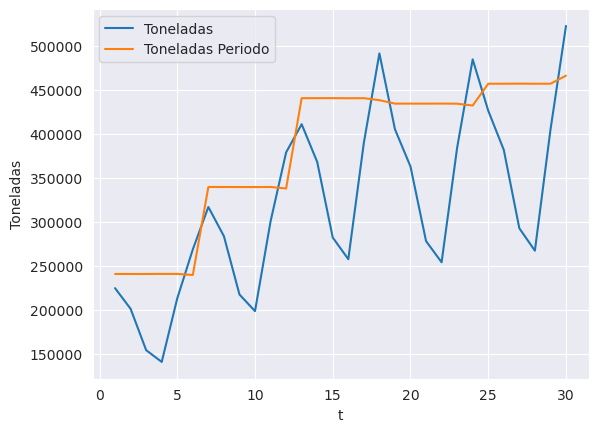

In [24]:
sns.lineplot(data=df2, x='t', y='Toneladas', label='Toneladas')
sns.lineplot(data=df2, x='t', y='Toneladas_periodo', label='Toneladas Periodo')